<a href="https://colab.research.google.com/github/basaanithanaveenkumar/Complete-EDA/blob/master/Reccommondation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data Analysis**

In [162]:
import pandas as pd

In [2]:
ds=pd.read_csv("backup.csv")
ds

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,Shangri-La Hotel Vancouver Drive way,Restaurent,4.0,8,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Vancouver, BC, Canada",Closed
379,379,Hilton Vancouver Metrotown,Hotel,4.2,1518,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Modern hotel with a heated rooftop pool & hot ...,Canvouver,"Burnaby, BC, Canada",Closed
380,380,Vancouver International Airport,Airport,4.2,4148,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Richmond, BC, Canada",Closed
381,381,Radisson Hotel Vancouver Airport,Hotel,4.0,841,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Polished hotel with free Wi-Fi & an airport sh...,Canvouver,"Richmond, BC, Canada",Closed


# **Import Dependencies Required**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
fil=open('data.json')
frame=json.load(fil)

In [9]:
def json_to_df(data):
  """
  This is a function which take json obejct and 
  convert and return that in DataFrame.
  """
  Dict={}
  # First seperation of data
  for kk, vv in data.items():
    for each in vv:
      for k,v in each.items():
        review=v[8]
        # Second seperation of data      
        for k1,v1 in review.items():  
          review1=v1
          # each row data seperation from key,value form.
          for each1 in review1:
            # if Restaurant key is not id dict add with list value or append value in list
            if 'Restaurant' not in Dict.keys():
              Dict['Restaurant']=[k]
            else:
              Dict['Restaurant'].append(k)
            # Access each element.
            for key,value in each1.items():
              if key not in Dict.keys():
                if key!='reviewRating':
                  Dict[key]=[value]
                else:
                  Dict[key]=[value['ratingValue']]
              else:
                if key!='reviewRating':
                  Dict[key].append(value)
                else:
                  Dict[key].append(value['ratingValue'])

  # Now we have dictionary with key and their value in list form
  # Now we will convert dict to dataframe.
  df=pd.DataFrame(data=Dict)    
  return df

In [13]:
newDF=json_to_df(frame)
newDF.head()

,Restaurant,reviewRating,datePublished,description,author
0,Fable,5,2020-03-16,Recommendations below!\n100% make reservation\...,Jennifer E.
1,Fable,4,2020-08-12,I couldn't ask for more on a slow night at the...,Manbir R.
2,Fable,5,2020-02-24,Whoa! It's been a while .\nAnd the wait was wo...,Mrs H.
3,Fable,4,2019-11-12,Came here for a brunch date on a Saturday arou...,Candace H.
4,Fable,4,2019-09-08,There are many brunch spots on this stretch of...,Abigail S.


In [15]:
ds.head(20)

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,good,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Inventive Pacific Northwest cuisine & extensiv...,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,good,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,Non-Veg,"Farm-to-table bistro presenting creative, area...",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,Non-Veg,Classic French dishes served for dinner in an ...,269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,"Airy, high-end restaurant in the Fairmont Hote...",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,good,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Long-time posh spot for Canadian steaks & cock...,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


In [17]:
ds.shape

(383, 22)

# remove unwanted columns


In [107]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 100 to 138
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of Restaurent             383 non-null    object 
 1   Type of Cusine                 383 non-null    object 
 2   Rating                         383 non-null    float64
 3   Total No of Ratings            383 non-null    int64  
 4   Classify                       383 non-null    int64  
 5   Cost                           383 non-null    object 
 6   Dine_in_availability           383 non-null    object 
 7   Takeaway_type                  383 non-null    object 
 8   Delivery_availability          383 non-null    object 
 9   Flexiability                   383 non-null    object 
 10  Dine                           383 non-null    int64  
 11  Take                           383 non-null    int64  
 12  deli                           383 non-null    i

In [159]:
da=ds.drop(columns=['clas',"veg /Non- Veg","Unnamed: 0"])

In [158]:
da.to_csv("data_ba.csv")

In [27]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of Restaurent             383 non-null    object 
 1   Type of Cusine                 383 non-null    object 
 2   Rating                         383 non-null    float64
 3   Total No of Ratings            383 non-null    int64  
 4   Classify                       383 non-null    int64  
 5   Cost                           383 non-null    object 
 6   Dine_in_availability           383 non-null    object 
 7   Takeaway_type                  383 non-null    object 
 8   Delivery_availability          383 non-null    object 
 9   Flexiability                   383 non-null    object 
 10  Dine                           383 non-null    int64  
 11  Take                           383 non-null    int64  
 12  deli                           383 non-null    int

In [28]:
da.describe()

,Rating,Total No of Ratings,Classify,Dine,Take,deli,Flex
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,4.258486,966.571802,0.652742,0.357702,0.295039,0.242820,0.323760
std,0.393301,1822.310828,0.476722,0.479951,0.456657,0.429348,0.468522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,638.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,1232.500000,1.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,31717.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
v=da['Total No of Ratings']
R=da['Rating']
C=da['Rating'].mean()
m=da['Total No of Ratings'].quantile(0.70)

In [30]:
da['weighted_average']=((R*v)+ (C*m))/(v+m)

In [31]:
da.head(5)

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848


# Sort based on decending order for recommondation purpose


In [34]:
res_ranking=da.sort_values('weighted_average',ascending=False)
res_ranking[['Name of Restaurent ', 'Type of Cusine', 'Rating','Total No of Ratings', 'weighted_average']].head(5)

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,weighted_average
357,Stanley Park,Park,4.8,31717,4.782107
2,Miku Vancouver,Sushi,4.6,4201,4.529963
281,Hotel Fairmont Pacific Rim,Restaurant,4.6,3592,4.520841
349,Purebread,Bakery and Cake Shop,4.7,1323,4.501183
42,Ramen DANBO,Ramen,4.6,2311,4.490971


Text(0, 0.5, 'Restaurent Name')

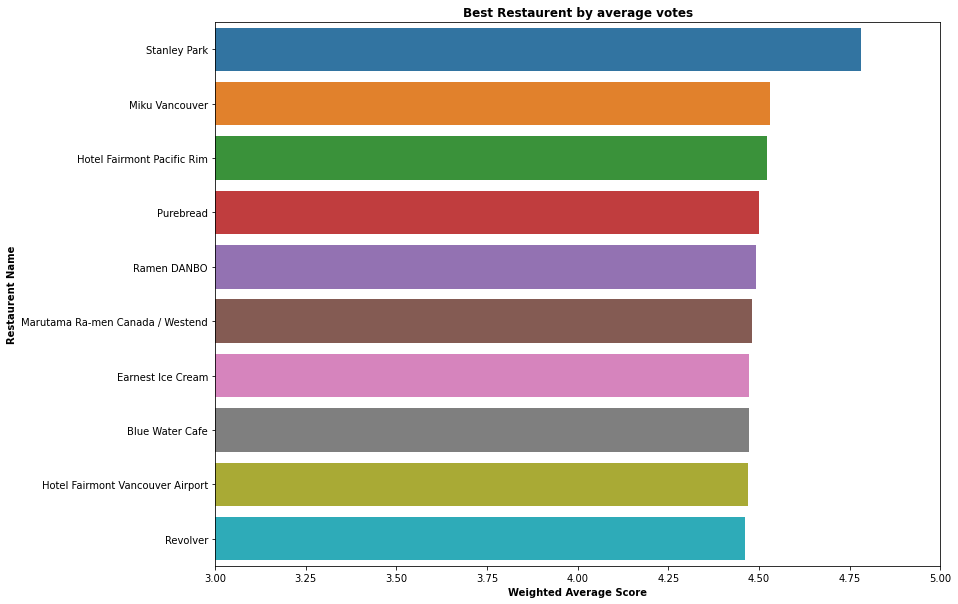

In [90]:
weight_average=res_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(13,10))
axis1=sns.barplot(x=weight_average['weighted_average'].head(20), y=weight_average['Name of Restaurent '].head(10), data=weight_average)
plt.xlim(3, 5)
plt.title('Best Restaurent by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Restaurent Name', weight='bold')

Creation of another priority based of costs

In [45]:
da.Cost.unique()

array(['Average Cost', 'Expensive', 'Too Expensive', 'Not Expensive'],
      dtype=object)

In [65]:
da['cos'] = da['Cost'].replace({'Not Expensive': 5, 'Average Cost': 4, 'Expensive': 3, 'Too Expensive': 2})

In [66]:
da.head()

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average,cos
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051,4
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416,4
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963,3
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623,2
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848,3


Text(0, 0.5, 'Name of REs')

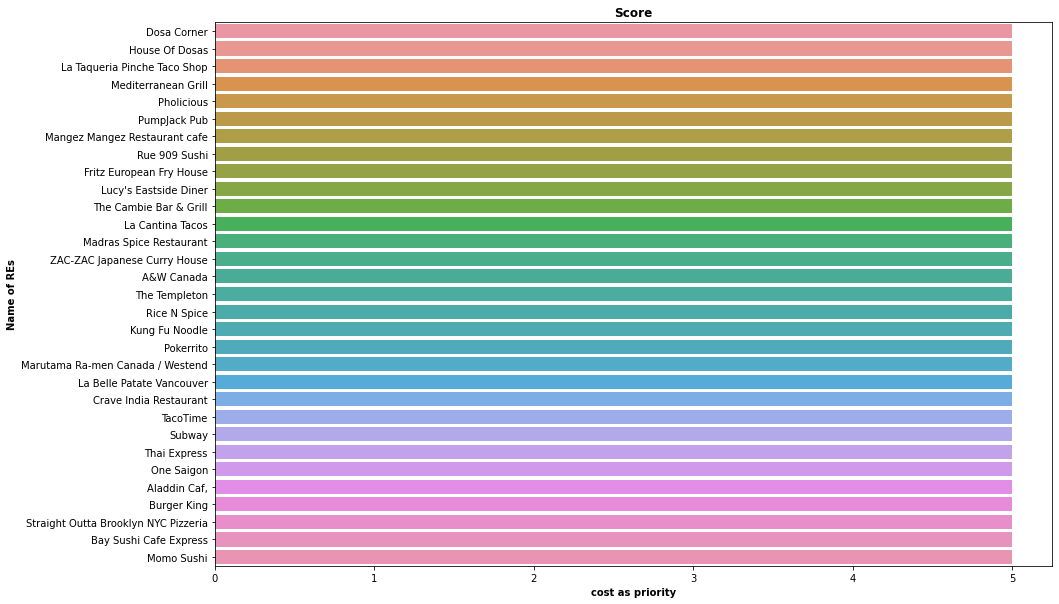

In [67]:
cos=da.sort_values('cos',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x=cos['cos'].head(31), y=cos['Name of Restaurent '].head(31), data=cos)

plt.title('Score', weight='bold')
plt.xlabel('cost as priority', weight='bold')
plt.ylabel('Name of REs', weight='bold')

# **create new recommondation score**

In [68]:
da['Recom_score'] = da["Dine"] + da["Take"]+da["deli"] + da["cos"]

In [69]:
da

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average,cos,Recom_score
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051,4,7
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416,4,7
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963,3,3
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623,2,5
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Shangri-La Hotel Vancouver Drive way,Restaurent,4.0,8,0,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,No Description,Canvouver,"Vancouver, BC, Canada",Closed,4.256592,4,4
379,Hilton Vancouver Metrotown,Hotel,4.2,1518,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Modern hotel with a heated rooftop pool & hot ...,Canvouver,"Burnaby, BC, Canada",Closed,4.224363,4,4
380,Vancouver International Airport,Airport,4.2,4148,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,No Description,Canvouver,"Richmond, BC, Canada",Closed,4.212116,4,4
381,Radisson Hotel Vancouver Airport,Hotel,4.0,841,0,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Polished hotel with free Wi-Fi & an airport sh...,Canvouver,"Richmond, BC, Canada",Closed,4.145546,4,4


Text(0, 0.5, 'Name of Restaurent')

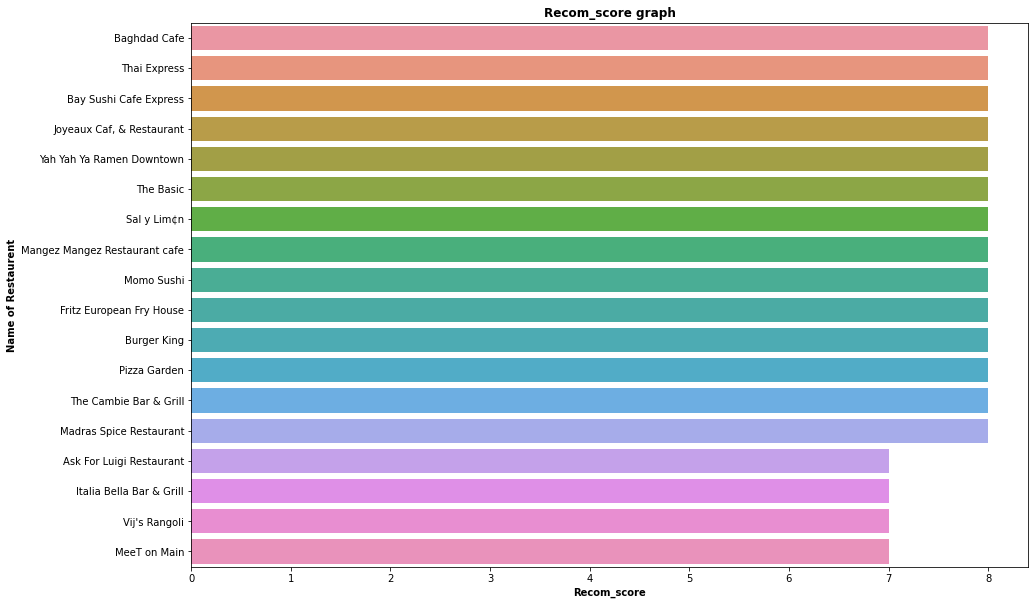

In [73]:
Recom_score=da.sort_values('Recom_score',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x=Recom_score['Recom_score'].head(31), y=Recom_score['Name of Restaurent '].head(18), data=Recom_score)

plt.title('Recom_score graph', weight='bold')
plt.xlabel('Recom_score', weight='bold')
plt.ylabel('Name of Restaurent', weight='bold')

In [88]:
da['score'] = da['Recom_score'] * 0.1 + da['weighted_average'] * 0.75+da['cos']*0.15
ds = da.sort_values(['score'], ascending=False)
ds[['Name of Restaurent ','score','Type of Cusine', 'Rating','Total No of Ratings', 'weighted_average','Recom_score','cos']].head(20)

,Name of Restaurent,score,Type of Cusine,Rating,Total No of Ratings,weighted_average,Recom_score,cos
100,Sal y Lim¢n,4.883318,Mexican,4.5,3626,4.444424,8,5
99,The Basic,4.790670,Breakfast,4.4,855,4.320893,8,5
203,Pizza Garden,4.781317,Pizza,4.4,591,4.308423,8,5
159,Fritz European Fry House,4.758617,Fast Food,4.3,976,4.278156,8,5
161,Mangez Mangez Restaurant cafe,4.755375,Restaurant,4.6,51,4.273834,8,5
204,Baghdad Cafe,4.754596,Middle Eastern,4.3,570,4.272794,8,5
72,The Templeton,4.746247,Diner,4.5,1409,4.394996,7,5
182,Joyeaux Caf‚ & Restaurant,4.728746,Vietnamese,4.2,570,4.238328,8,5
130,Madras Spice Restaurant,4.727547,Indian,4.2,642,4.236729,8,5
274,Yah Yah Ya Ramen Downtown,4.726756,Ramen,4.2,693,4.235675,8,5


In [83]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of Restaurent             383 non-null    object 
 1   Type of Cusine                 383 non-null    object 
 2   Rating                         383 non-null    float64
 3   Total No of Ratings            383 non-null    int64  
 4   Classify                       383 non-null    int64  
 5   Cost                           383 non-null    object 
 6   Dine_in_availability           383 non-null    object 
 7   Takeaway_type                  383 non-null    object 
 8   Delivery_availability          383 non-null    object 
 9   Flexiability                   383 non-null    object 
 10  Dine                           383 non-null    int64  
 11  Take                           383 non-null    int64  
 12  deli                           383 non-null    int

Text(0, 0.5, 'Restaurent Title')

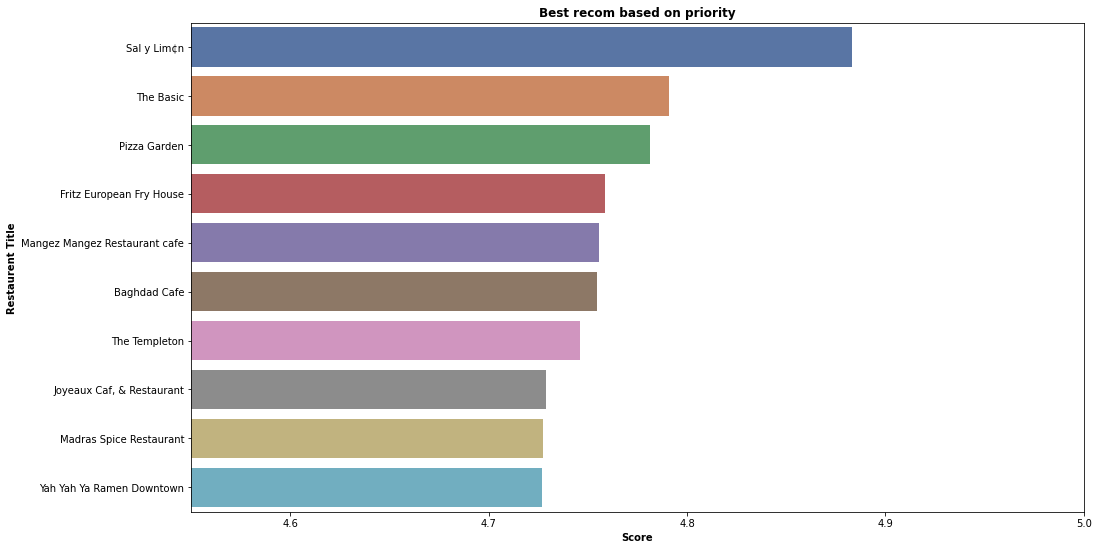

In [86]:
scored_df = da.sort_values('score', ascending=False)

plt.figure(figsize=(16,9))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['Name of Restaurent '].head(10), data=scored_df, palette='deep')

plt.xlim(4.55, 5)
plt.title('Best recom based on priority', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Restaurent Title', weight='bold')

## **content Based Recommondation system using NLP**

In [129]:
ds=pd.read_csv("backup.csv")
ds

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,clas,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,veg /Non- Veg,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,NaN,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,bad,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,Non-Veg,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,good,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Non-Veg,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,good,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Non-Veg,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,good,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Non-Veg,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,Shangri-La Hotel Vancouver Drive way,Restaurent,4.0,8,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Vancouver, BC, Canada",Closed
379,379,Hilton Vancouver Metrotown,Hotel,4.2,1518,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Modern hotel with a heated rooftop pool & hot ...,Canvouver,"Burnaby, BC, Canada",Closed
380,380,Vancouver International Airport,Airport,4.2,4148,1,good,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,No Description,Canvouver,"Richmond, BC, Canada",Closed
381,381,Radisson Hotel Vancouver Airport,Hotel,4.0,841,0,bad,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,Non-Veg,Polished hotel with free Wi-Fi & an airport sh...,Canvouver,"Richmond, BC, Canada",Closed


In [130]:
da.head(5)

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status,weighted_average,cos,Recom_score,score
0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed,4.309051,4,7,4.531788
1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed,4.313416,4,7,4.535062
2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a so...,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed,4.529963,3,3,4.147472
3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offe...,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed,4.472623,2,5,4.154467
4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,Chic exposed-brick space serving creative Belg...,568 Beatty St,"Vancouver, BC, Canada",Closed,4.359848,3,6,4.319886


In [131]:
ds.head()['Description of the Restaurent']

0                                       No Description
1                                       No Description
2    Sushi & sustainable seafood are served in a so...
3    Destination in a heritage warehouse space offe...
4    Chic exposed-brick space serving creative Belg...
Name: Description of the Restaurent, dtype: object

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
ds['Description of the Restaurent'] = ds['Description of the Restaurent'].fillna('')

In [133]:
tfv_matrix = tfv.fit_transform(ds['Description of the Restaurent'])

In [134]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [135]:
indi = pd.Series(ds.index, index=ds['Name of Restaurent '])

In [136]:
indi

Name of Restaurent 
Las Tortas Mexican                        0
The Story Cafe -                          1
Miku Vancouver                            2
Blue Water Cafe                           3
Chambar Restaurant                        4
                                       ... 
Shangri-La Hotel Vancouver Drive way    378
Hilton Vancouver Metrotown              379
Vancouver International Airport         380
Radisson Hotel Vancouver Airport        381
Sequoia Company of Restaurants          382
Length: 383, dtype: int64

In [137]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    res_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return ds['Name of Restaurent '].iloc[res_indices]

In [141]:
give_rec('Miku Vancouver')

17     Ancora Waterfront Dining and Patio - False Creek
376                             Glo Restaurant + Lounge
116                           Showcase Restaurant & Bar
3                                       Blue Water Cafe
168                            The Boathouse Restaurant
4                                    Chambar Restaurant
57                                 delhi6 Indian bistro
257                                          Oceans 999
65                                  Seasons in the Park
347                                    Altitudes Bistro
Name: Name of Restaurent , dtype: object

In [150]:
give_rec('Trattoria')

231    BiBo Pizzeria con Cucina                      
53     Italia Bella Bar & Grill                      
233    Bellaggio Cafe                                
50     CinCin Ristorante + Bar                       
172    Campagnolo                                    
239    Rogue Kitchen & Wetbar                        
83     Sura Korean Royal Cuisine Restaurant Vancouver
79     Tavola                                        
245    Akbar's Own Indian Restaurant                 
190    The Parlour                                   
Name: Name of Restaurent , dtype: object

In [148]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

In [149]:
ds[['Name of Restaurent ','Description of the Restaurent']].head(60)

,Name of Restaurent,Description of the Restaurent
0,Las Tortas Mexican,No Description
1,The Story Cafe -,No Description
2,Miku Vancouver,Sushi & sustainable seafood are served in a sophisticated setting with a patio & water views.
3,Blue Water Cafe,Destination in a heritage warehouse space offering sustainable seafood with innovative touches.
4,Chambar Restaurant,"Chic exposed-brick space serving creative Belgian cuisine & sustainable seafood, plus beer & wine."
5,Hawksworth Restaurant,Inventive Pacific Northwest cuisine & extensive wine list served in the Rosewood Hotel Georgia.
6,Forage,"Farm-to-table bistro presenting creative, area-sourced plates, plus local beer & wine on tap."
7,St Lawrence Restaurant,"Classic French dishes served for dinner in an intimate, casually elegant setting."
8,Botanist,"Airy, high-end restaurant in the Fairmont Hotel offering modern Canadian cuisine, wine & cocktails."
9,Hy's Steakhouse & Cocktail Bar,Long-time posh spot for Canadian steaks & cocktails in a traditional wood-paneled setting.


In [140]:
ds.head(40)['']

0                                        No Description
1                                        No Description
2     Sushi & sustainable seafood are served in a so...
3     Destination in a heritage warehouse space offe...
4     Chic exposed-brick space serving creative Belg...
5     Inventive Pacific Northwest cuisine & extensiv...
6     Farm-to-table bistro presenting creative, area...
7     Classic French dishes served for dinner in an ...
8     Airy, high-end restaurant in the Fairmont Hote...
9     Long-time posh spot for Canadian steaks & cock...
10    Stylish dining room for modern Chinese sharing...
11    Classy setting with an open kitchen where a po...
12    Stylish eatery offering ambitious vegetarian/v...
13    Charming all-day cafe serving French classics,...
14    Sophisticated locale for high-end, locally sou...
15    Contemporary Canadian fare & creative cocktail...
16    Housed in a historic building, this stylish ou...
17    Chic, bi-level space for seafood with West

In [160]:
fd=pd.read_csv('data_ba.csv')

In [161]:
fd.head(20)

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a sophisticated setting with a patio & water views.,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offering sustainable seafood with innovative touches.,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,"Chic exposed-brick space serving creative Belgian cuisine & sustainable seafood, plus beer & wine.",568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Inventive Pacific Northwest cuisine & extensive wine list served in the Rosewood Hotel Georgia.,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,"Farm-to-table bistro presenting creative, area-sourced plates, plus local beer & wine on tap.",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,"Classic French dishes served for dinner in an intimate, casually elegant setting.",269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,"Airy, high-end restaurant in the Fairmont Hotel offering modern Canadian cuisine, wine & cocktails.",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Long-time posh spot for Canadian steaks & cocktails in a traditional wood-paneled setting.,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


# **Correlation based recommondation system**




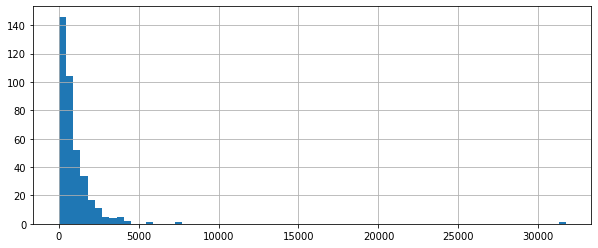

In [164]:
plt.figure(figsize=(10,4))
fd['Total No of Ratings'].hist(bins=70)

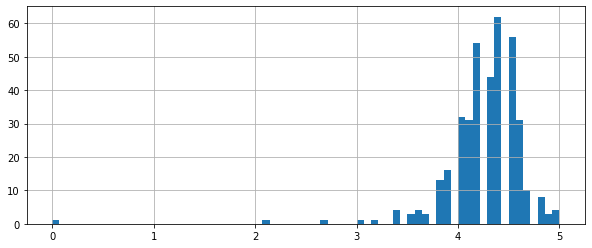

In [166]:
plt.figure(figsize=(10,4))
fd['Rating'].hist(bins=70)

# ***lets create a better visualization with joint plot***

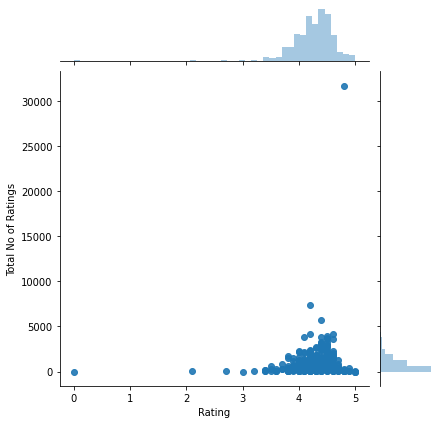

In [169]:
sns.jointplot(x='Rating',y='Total No of Ratings',data=fd,alpha=0.9)

In [170]:
fd

,Unnamed: 0,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Classify,Cost,Dine_in_availability,Takeaway_type,Delivery_availability,Flexiability,Dine,Take,deli,Flex,Opening_time,Description of the Restaurent,Location and Address,Landmark,Current Status
0,0,Las Tortas Mexican,Restaurant,4.5,287,1,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,No Description,Canvouver,3353 Cambie Street,Closed
1,1,The Story Cafe -,Restaurant,4.7,154,0,Average Cost,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,9AM,No Description,Canvouver,2800 Sexsmith Road,Closed
2,2,Miku Vancouver,Sushi,4.6,4201,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Sushi & sustainable seafood are served in a sophisticated setting with a patio & water views.,200 Granville St # 70 ú In the Granville Square,"Vancouver, BC, Canada",Closed
3,3,Blue Water Cafe,Seafood,4.6,1822,1,Too Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,4:30PM,Destination in a heritage warehouse space offering sustainable seafood with innovative touches.,1095 Hamilton St ú In Urban Systems,"Vancouver, BC, Canada",Closed
4,4,Chambar Restaurant,Restaurant,4.4,2736,1,Expensive,Dine-in,Takeaway,Delivery,Flexiable,1,1,1,1,11:30AM,"Chic exposed-brick space serving creative Belgian cuisine & sustainable seafood, plus beer & wine.",568 Beatty St,"Vancouver, BC, Canada",Closed
5,5,Hawksworth Restaurant,Restaurant,4.4,907,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Inventive Pacific Northwest cuisine & extensive wine list served in the Rosewood Hotel Georgia.,801 W Georgia St ú In the Rosewood Hotel Georgia,"Vancouver, BC, Canada",Closed
6,6,Forage,Pacific Northwest,4.5,1250,1,Average Cost,Dine-in,Takeaway,Dilivery Not Available,Flexiable,1,1,0,1,4PM,"Farm-to-table bistro presenting creative, area-sourced plates, plus local beer & wine on tap.",1300 Robson St,"Vancouver, BC, Canada",Closed
7,7,St Lawrence Restaurant,French,4.7,564,1,Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,5PM,"Classic French dishes served for dinner in an intimate, casually elegant setting.",269 Powell St,"Vancouver, BC, Canada",Closed
8,8,Botanist,Pacific Northwest,4.5,729,1,Average Cost,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,10AM,"Airy, high-end restaurant in the Fairmont Hotel offering modern Canadian cuisine, wine & cocktails.",Canvouver,1038 Canada Pl ú In the Fairmont Pacific Rim,Temporarily closed
9,9,Hy's Steakhouse & Cocktail Bar,Steak,4.5,1226,1,Too Expensive,DIne In Not Available,Take In Not Available,Dilivery Not Available,Not Flexiable,0,0,0,0,11:30AM,Long-time posh spot for Canadian steaks & cocktails in a traditional wood-paneled setting.,637 Hornby St ú Near the Vancouver Art Gallery,"Vancouver, BC, Canada",Closed


In [171]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     383 non-null    int64  
 1   Name of Restaurent             383 non-null    object 
 2   Type of Cusine                 383 non-null    object 
 3   Rating                         383 non-null    float64
 4   Total No of Ratings            383 non-null    int64  
 5   Classify                       383 non-null    int64  
 6   Cost                           383 non-null    object 
 7   Dine_in_availability           383 non-null    object 
 8   Takeaway_type                  383 non-null    object 
 9   Delivery_availability          383 non-null    object 
 10  Flexiability                   383 non-null    object 
 11  Dine                           383 non-null    int64  
 12  Take                           383 non-null    int

In [174]:
resmat=fd.pivot_table(index='Type of Cusine',columns='Name of Restaurent ',values='Rating')

In [183]:
resmat.tail(20)

Name of Restaurent,1931 Gallery Bistro,33 Acres Brewing Company,49th Parallel Caf‚ & Lucky's Doughnuts - MAIN,A&W Canada,ABM Food Equipment - Restaurant Equipment & Supplies,AK's Just Bite Fresh,Absinthe Bistro,Afghan Horsemen Restaurant,Akbar's Own Indian Restaurant,Aladdin Caf‚,Aleph Eatery,Altitudes Bistro,Ancora Waterfront Dining and Patio - Ambleside,Ancora Waterfront Dining and Patio - False Creek,Anh and Chi,AnnaLena,Ashiana Tandoori,Ask For Luigi Restaurant,Atlas Steak + Fish,Au Comptoir,BA Restaurant Holdings Ltd.,Bacchus Restaurant & Lounge,Baghdad Cafe,Ballyhoo Public House,Bao Bei,Bar One,Basil Box,Bauhaus Restaurant,Bay Sushi Cafe Express,Bella Gelateria,Bellaggio Cafe,Best Neighbours Restaurant & Pizza House/ Johnny?s on Oak,BiBo Pizzeria con Cucina,Bibo Pizzeria,Bishop's,Bistro Verde,Black+Blue,Blue Water Cafe,Botanist,Boulevard Kitchen & Oyster Bar,...,"The Westin Bayshore, Vancouver",Thierry,Thomas Haas,Tojo's Restaurant,Tokyo Joe's Sushi in Vancouver,Top Of Vancouver Revolving Restaurant,Tractor Everyday Healthy Foods - Marine Building,Tractor Foods,Trattoria,Trees Organic Coffee,Trump International Hotel & Tower Vancouver,Twisted Fork Bistro,Umi Sushi Express,Unwind,Urban Sushi Cafe,Vancouver Convention Centre,Vancouver Foodie Tours,Vancouver International Airport,Vancouver Restaurant Brokers,Victoria Chinese Restaurant,Viet Sub Vietnamese Cuisine,Vij's,Vij's Rangoli,Vonns,West Oak,West Vancouver Centennial Seawalk,White Spot Dunsmuir,Wildebeest,Wildtale Yaletown,Yah Yah Ya Ramen Downtown,Yui Japanese Bistro,ZAC-ZAC Japanese Curry House,Zaatar w Zeit,Zakkushi Dining on Main,Zefferelli's,Zen Japanese Restaurant,Zocalo Modern Cantina,alphabet city,delhi6 Indian bistro,per se Social Corner
Type of Cusine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sandwich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seafood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shopping mall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Small Plates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South East Asian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [189]:
sim_to_Wildtale=resmat['Wildtale Yaletown']

In [190]:
sim_to_Wildtale

Type of Cusine
 Sushi                          NaN 
Afghani                         NaN 
Airport                         NaN 
American                        NaN 
Asian Fusion                    NaN 
Bakery and Cake Shop            NaN 
Bar                             NaN 
Barbecue                        NaN 
Bistro                          NaN 
Breakfast                       NaN 
Brewery                         NaN 
Brunch                          NaN 
Burritos                        NaN 
Business broker                 NaN 
Cafe                            NaN 
Cambodian                       NaN 
Canadian                        NaN 
Cantonese                       NaN 
Chicken                         NaN 
Chinese                         NaN 
Chinese Noodles                 NaN 
Coffee shop                     NaN 
Commercial real estate agency   NaN 
Continental restaurant          NaN 
Convention center               NaN 
Corporate office                NaN 
Dessert                

In [193]:
sim=resmat.corrwith(sim_to_Wildtale)

In [194]:
sim

Name of Restaurent 
1931 Gallery Bistro                                                  NaN
33 Acres Brewing Company                                             NaN
49th Parallel Caf‚ & Lucky's Doughnuts - MAIN                        NaN
A&W Canada                                                           NaN
ABM Food Equipment - Restaurant Equipment & Supplies                 NaN
AK's Just Bite Fresh                                                 NaN
Absinthe Bistro                                                      NaN
Afghan Horsemen Restaurant                                           NaN
Akbar's Own Indian Restaurant                                        NaN
Aladdin Caf‚                                                         NaN
Aleph Eatery                                                         NaN
Altitudes Bistro                                                     NaN
Ancora Waterfront Dining and Patio - Ambleside                       NaN
Ancora Waterfront Dining and Pa

In [182]:
fd['Type of Cusine'].unique()

array(['Restaurant', ' Sushi', 'Seafood', 'Pacific Northwest', 'French',
       'Steak', 'Chinese', 'Mediterranean', 'Vegetarian', 'Canadian',
       'German', 'Fusion restaurant', 'Cambodian', 'Diner', 'Fine Dining',
       'Italian', 'Brunch', 'Oyster Bar', 'Izakaya', 'European', 'Tuscan',
       'Continental restaurant', 'Japanese', 'Ramen', 'Thai', 'Pizza',
       'Asian Fusion', 'Indian', 'Small Plates', 'Takeout restaurant',
       'Korean', 'Mexican', 'Vietnamese', 'Chinese Noodles',
       'Latin American', 'Breakfast', 'Spanish', 'Sushi', 'Burritos',
       'Middle Eastern', 'Grill', 'Pho', 'Polynesian restaurant',
       'Qu‚b‚cois restaurant', 'Pan-Latin restaurant', 'Fast Food',
       'Yakiniku', 'Noodle Shop', 'Ethiopian', 'Dessert', 'Afghani',
       'Japanese steakhouse', 'South Asian', 'Health Food', 'Bistro',
       'Sandwich', 'Family-friendly', 'American', 'Hamburger', 'Barbecue',
       'Chicken', 'Persian', 'South East Asian', 'Tapas', 'Lebanese',
       'Hawaiian